

# **ANIMAL CLASSIFICATION**







## **Importing Required Libraries:**  
Python libraries are imported for data analysis, visualization, and numerical computation. Pandas is used for handling structured datasets, NumPy supports numerical operations, while Matplotlib and Seaborn are used to create meaningful visualizations. The warnings library is used to suppress unnecessary warning messages so that the notebook output remains clean and easy to read.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

## **Loading the Datasets:**
Two datasets are loaded using Pandas.
*   The **zoo.csv** file contains animal characteristics along with their corresponding class labels
*   **class.csv** provides a mapping between class numbers and animal class names.
  These datasets together help in both training the model and interpreting the classification results in a meaningful way.

In [ ]:
zoo = pd.read_csv("/content/zoo.csv")
animal_class = pd.read_csv("/content/class.csv")

# **Exploratory Data Analysis**

## **Checking Dataset Dimensions:**
It shows the number of rows and columns present. This helps verify the size of the data and ensures that it has been loaded correctly before proceeding with further analysis.

In [ ]:
print(zoo.shape)
print(animal_class.shape)

(101, 18)
(7, 4)


## **Viewing Column Names:**
All column names of the zoo dataset are displayed. This provides a clear understanding of the features used for classification, such as hair, feathers, eggs, legs, aquatic nature, and other biological attributes.


In [ ]:
zoo.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

## **Previewing the Data:**
Each row represents an animal described using binary biological features (like hair, milk, eggs) and a numerical feature (legs). The class_type column serves as the target variable.

In [ ]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


The entire class mapping table is viewed. This gives an initial overview of how the data looks and how animal features correspond to class labels.

In [ ]:
animal_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Observation: The dataset information shows that all features have valid data types and there are no missing values, indicating good data quality.

In [ ]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Observation: The statistical summary reveals that most features are binary in nature, while numerical attributes like legs show limited and meaningful variation.Generates summary statistics like mean, min, max, and quartiles.

In [ ]:
class_dist = zoo["class_type"].value_counts().sort_index()
class_dist

,count
class_type,
1,41
2,20
3,5
4,13
5,4
6,8
7,10


Observation:
1. Class 1 has the highest number of animal species (41 records), making it the dominant class in the dataset.
2. Class 2 (20) and Class 4 (13) have moderate representation compared to other classes.
3. Classe 3 (5) and Class 5 (4) have very few samples, indicating potential class imbalance.
4. Classe 6 (8) and Class 7 (10) show reasonable but limited representation.



In [ ]:
animal_class[['Class_Number','Number_Of_Animal_Species_In_Class']]

,Class_Number,Number_Of_Animal_Species_In_Class
0,1,41
1,2,20
2,3,5
3,4,13
4,5,4
5,6,8
6,7,10


Observation:


*   The counts in the zoo dataset perfectly match the values in the class reference table.
*  This confirms correct class labeling and data consistency, making the dataset reliable for modeling.



In [ ]:
zoo.isnull().sum()

,0
animal_name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


There are no missing values in any column of the dataset, indicating complete and well-maintained data.

In [ ]:
zoo.duplicated().sum()

np.int64(0)

Observation:The dataset contains zero duplicate records, ensuring no repeated animal entries.

# **Class Label Mapping:**


*  A class mapping dictionary is created to convert numeric class_type values into meaningful animal class names.
*  A new column class_name is added to the zoo dataset, improving readability and interpretability.



In [ ]:
class_map = dict(zip(
    animal_class["Class_Number"],
    animal_class["Class_Type"]
))

# Add class names to zoo dataset for better understanding
zoo['class_name'] = zoo['class_type'].map(class_map)
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


# **Visualizations to Understand Data**

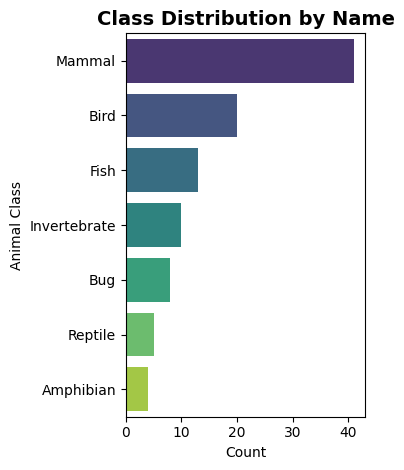

In [ ]:
plt.subplot(1, 2, 2)
class_name_counts = zoo['class_name'].value_counts()
sns.barplot(x=class_name_counts.values, y=class_name_counts.index, palette="viridis")
plt.title("Class Distribution by Name", fontsize=14, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Animal Class")
plt.tight_layout()
plt.show()

Shows how many animals belong to each class. The dataset is imbalanced (Mammals dominate).

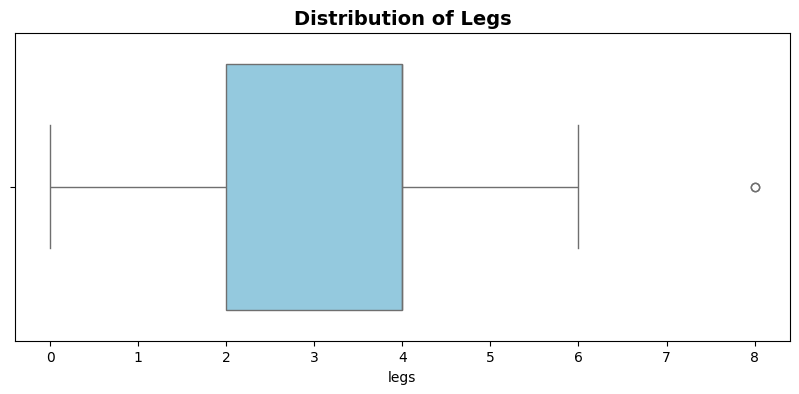

In [ ]:
# Legs distribution
plt.figure(figsize=(10, 4))
sns.boxplot(x=zoo["legs"], color='skyblue')
plt.title("Distribution of Legs", fontsize=14, fontweight='bold')
plt.show()



In [ ]:
Q1 = zoo["legs"].quantile(0.25)
Q3 = zoo["legs"].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(lower_fence, upper_fence)


-1.0 7.0


In [ ]:
outliers = zoo[(zoo["legs"] < lower_fence) | (zoo["legs"] > upper_fence)]
outliers


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class_name
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,Invertebrate
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,Invertebrate


Observation : A few animals with very high leg counts (e.g., 8) appear as outliers, indicating rare species like invertebrates.

Animals with higher leg counts are valid biological cases and not data errors. As they provide strong class-level signals in this classification task, **outlier removal is not required**.

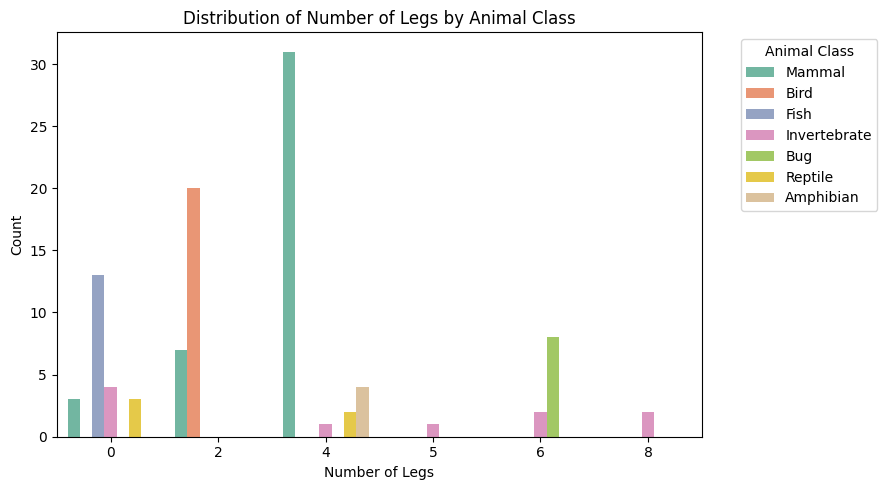

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Order classes by frequency (clear legend order)
class_order = zoo['class_name'].value_counts().index

plt.figure(figsize=(9,5))
sns.countplot(
    x='legs',
    data=zoo,
    hue='class_name',
    hue_order=class_order,
    palette='Set2'
)

plt.title("Distribution of Number of Legs by Animal Class")
plt.xlabel("Number of Legs")
plt.ylabel("Count")

plt.legend(
    title="Animal Class",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


Observation: The number of legs shows a strong class wise separation, with minimal overlap, making it a highly discriminative feature for animal classification.

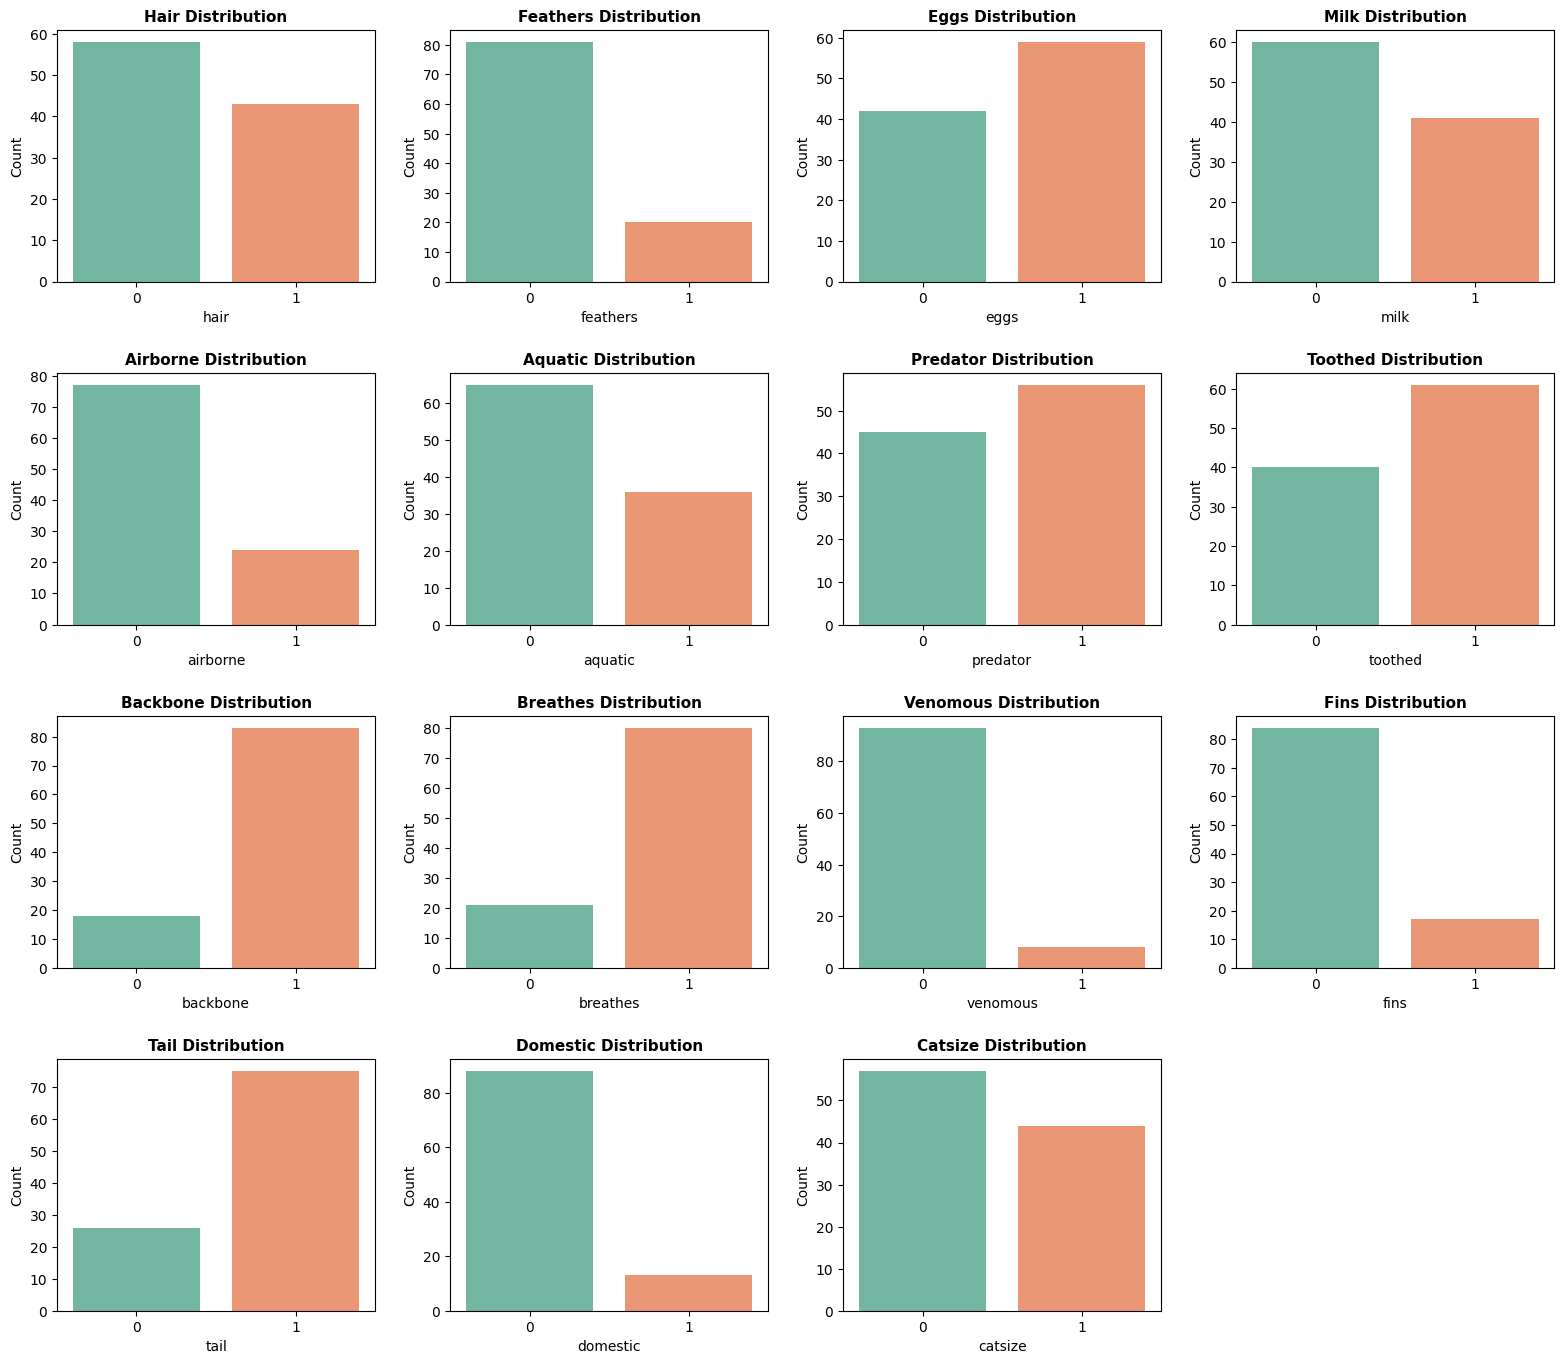

In [ ]:
# #Binary Feature Distributions
import math
binary_features = [
    'hair','feathers','eggs','milk','airborne',
    'aquatic','predator','toothed','backbone','breathes',
    'venomous','fins','tail','domestic','catsize'
]

n_cols = 4
n_rows = math.ceil(len(binary_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3.5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    sns.countplot(x=col, data=zoo, ax=axes[i], palette='Set2')
    axes[i].set_title(f"{col.capitalize()} Distribution", fontsize=11, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

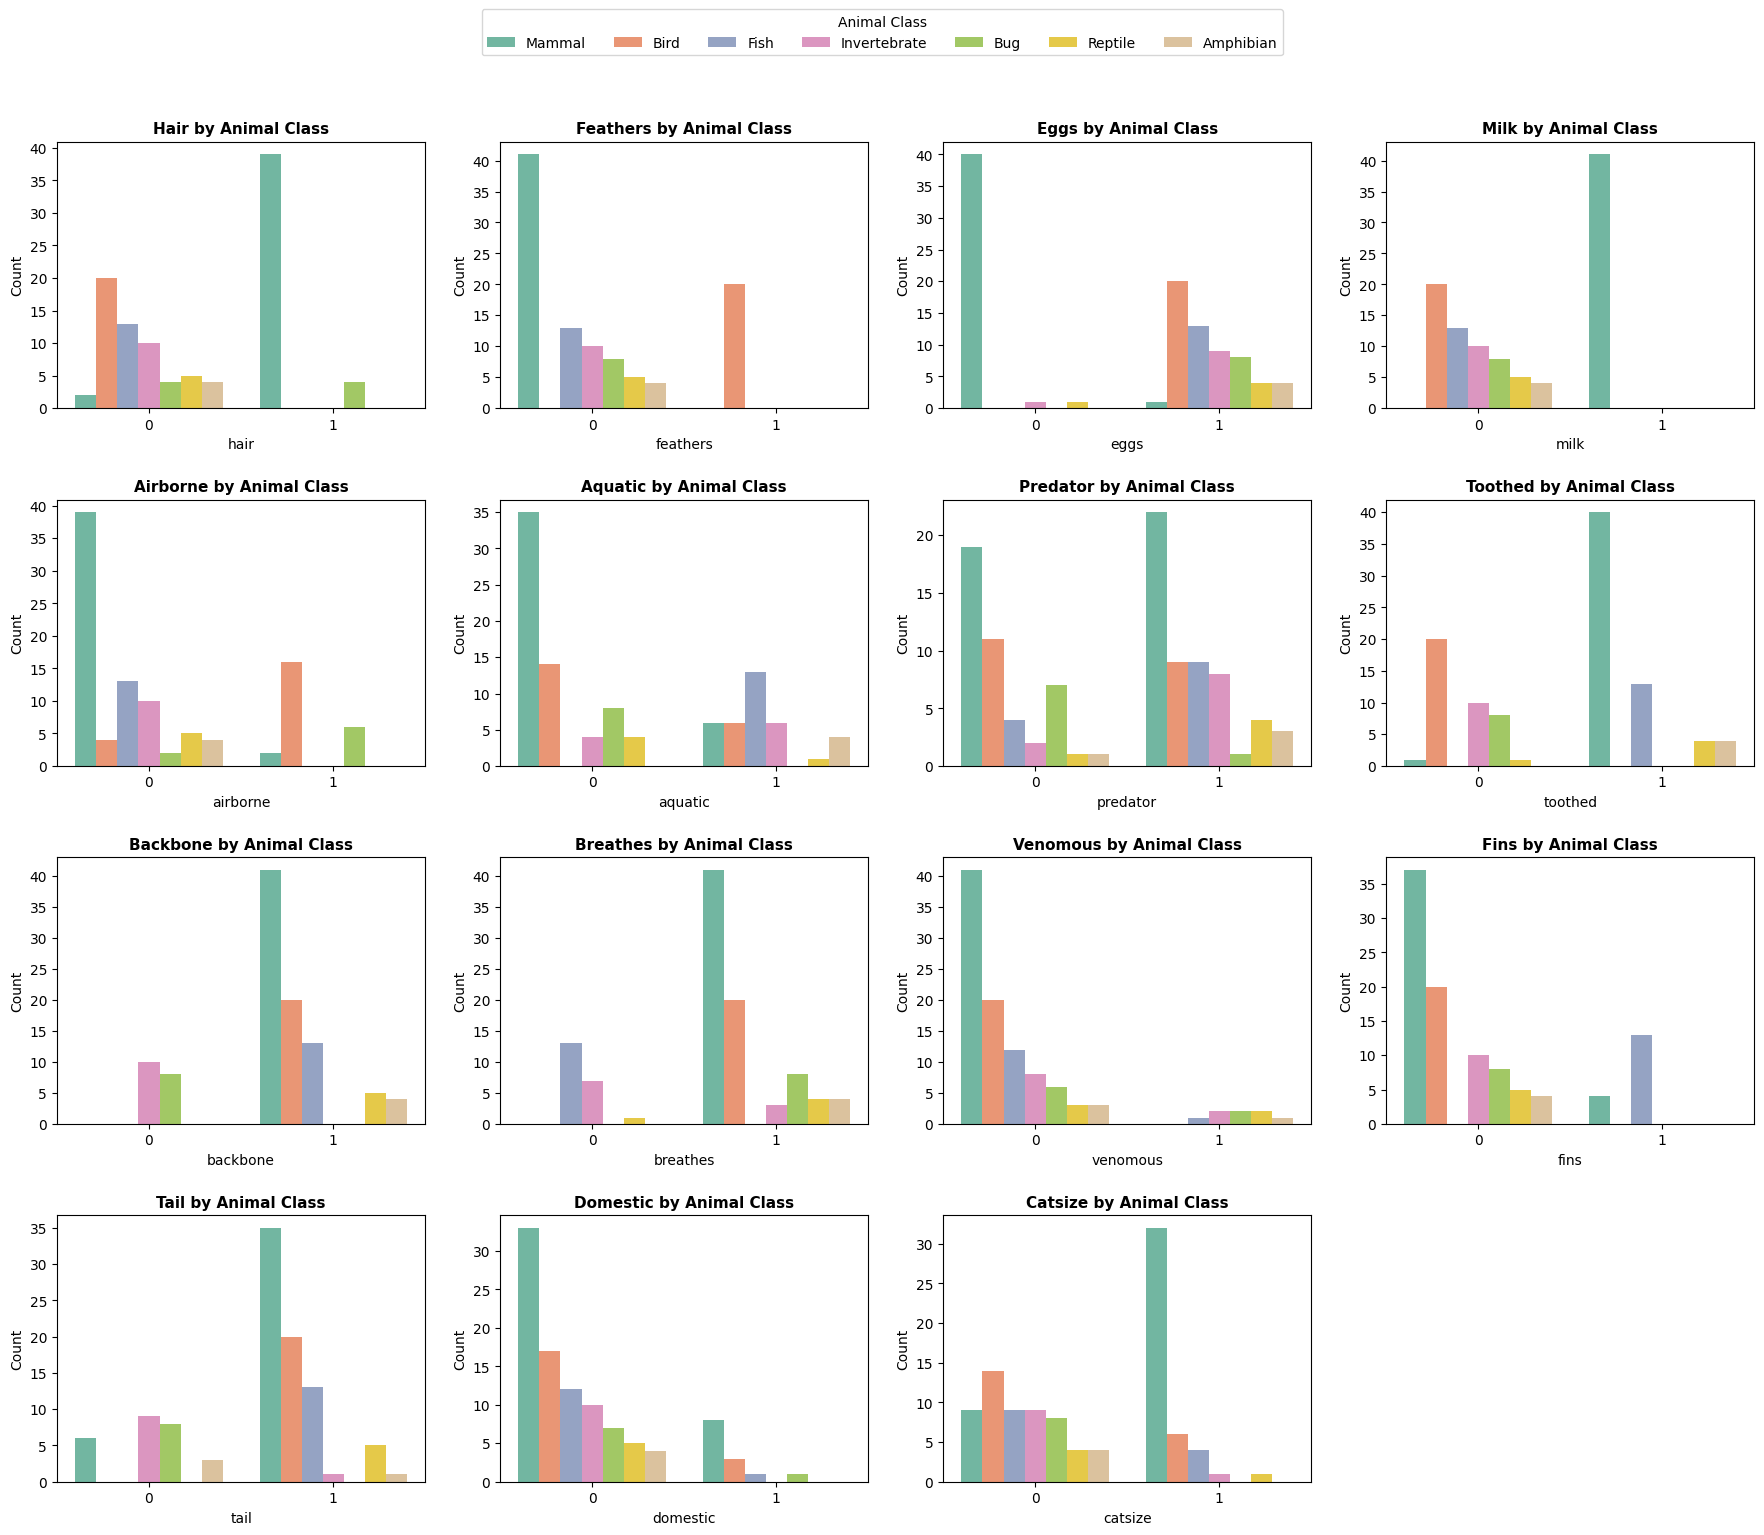

In [ ]:
import math

binary_features = [
    'hair','feathers','eggs','milk','airborne',
    'aquatic','predator','toothed','backbone','breathes',
    'venomous','fins','tail','domestic','catsize'
]
# Order classes by frequency for consistent comparison
class_order = zoo['class_name'].value_counts().index

n_cols = 4
n_rows = math.ceil(len(binary_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3.8 * n_rows))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    sns.countplot(
        x=col,
        data=zoo,
        hue='class_name',
        hue_order=class_order,
        palette='Set2',
        ax=axes[i]
    )

    axes[i].set_title(f"{col.capitalize()} by Animal Class", fontsize=11, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend_.remove()   # remove individual legends

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Animal Class",
    loc="upper center",
    ncol=7,
    bbox_to_anchor=(0.5, 1.02)
)

plt.tight_layout(rect=[0, 0, 1, 0.96], pad=2.0)
plt.show()


Observation: Binary features show strong class-wise separation, with attributes like milk (mammals), feathers (birds), fins (fish), and backbone acting as clear identifiers.

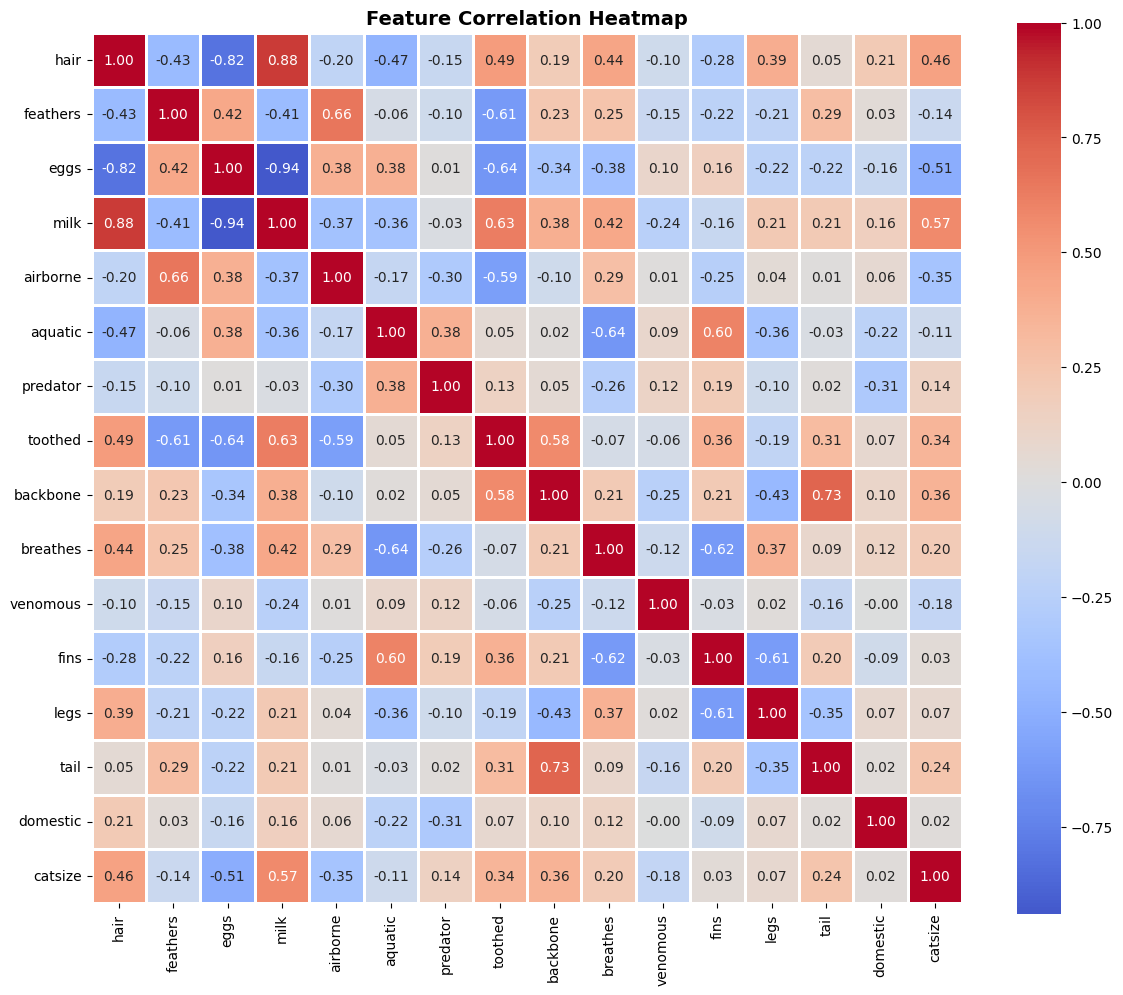

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = zoo.drop(columns=["animal_name", "class_type", "class_name"]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            square=True, linewidths=1)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



*   Strong correlations reflect biological consistency, such as hair–milk (positive), feathers–eggs (positive), and fins–aquatic (positive), while milk–eggs show a strong negative correlation.
*   These meaningful relationships indicate low randomness and confirm that the features are informative and well-suited for accurate animal classification.



# **Splitting Data for Modelling**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,

)
X = zoo.drop(columns=['animal_name', 'class_type', 'class_name'])
y = zoo['class_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20, stratify=y
)


In [ ]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "Random Forest": RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=4,
    max_features='sqrt',
    random_state=42
),
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=2),
        n_estimators=100,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(max_depth=3, random_state=42)
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Train F1 (Macro)": f1_score(y_train, y_train_pred, average='macro'),
        "Test F1 (Macro)": f1_score(y_test, y_test_pred, average='macro'),
        "Train F1 (Weighted)": f1_score(y_train, y_train_pred, average='weighted'),
        "Test F1 (Weighted)": f1_score(y_test, y_test_pred, average='weighted'),
        "Overfit Gap": train_acc - test_acc
    })


results_df = pd.DataFrame(results)

# Sort by best generalization metric
results_df = results_df.sort_values(by="Test F1 (Macro)", ascending=False)

results_df


,Model,Train Accuracy,Test Accuracy,Train F1 (Macro),Test F1 (Macro),Train F1 (Weighted),Test F1 (Weighted),Overfit Gap
0,Logistic Regression,0.9750,1.000000,0.941249,1.000000,0.971320,1.000000,-0.025000
3,Random Forest,0.9875,1.000000,0.972789,1.000000,0.986905,1.000000,-0.012500
5,Gradient Boosting,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,Decision Tree,0.9875,0.952381,0.978610,0.923810,0.987299,0.949206,0.035119
2,SVM,0.9500,0.952381,0.839954,0.836735,0.926504,0.931973,-0.002381
4,AdaBoost,0.9250,0.857143,0.743400,0.617687,0.910658,0.833560,0.067857


*   Ensemble models like Random Forest and Gradient Boosting achieved perfect test performance with zero overfitting gap, indicating strong learning on this split but also **suggesting possible optimism due to limited data**.
*   SVM and Decision Tree show more realistic generalization with slightly lower test F1 scores, while AdaBoost underperforms, highlighting sensitivity to small datasets.

### **Changing the split size for better generalization without overfiting**
Changing the split size improves the reliability of model evaluation when working with limited data by reducing bias from small test sets.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,

)
X = zoo.drop(columns=['animal_name', 'class_type', 'class_name'])
y = zoo['class_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=20, stratify=y
)


# **Training each model seperately**

In [ ]:
lr = LogisticRegression(max_iter=1000, multi_class='ovr')
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Logistic Regression")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 (Macro):", f1_score(y_train, y_train_pred, average='macro'))
print("Test F1 (Macro):", f1_score(y_test, y_test_pred, average='macro'))
print("Overfit Gap:", accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred))


Logistic Regression
Train Accuracy: 0.9846153846153847
Test Accuracy: 0.8888888888888888
Train F1 (Macro): 0.9661375661375661
Test F1 (Macro): 0.6893939393939394
Overfit Gap: 0.09572649572649583


Logistic Regression showed moderate test performance but struggled with non-linear relationships in the data. Its linear nature limits its ability to capture complex biological rules.

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print("Decision Tree")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 (Macro):", f1_score(y_train, y_train_pred, average='macro'))
print("Test F1 (Macro):", f1_score(y_test, y_test_pred, average='macro'))
print("Overfit Gap:", accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred))


Decision Tree
Train Accuracy: 0.9846153846153847
Test Accuracy: 0.8611111111111112
Train F1 (Macro): 0.9510204081632653
Test F1 (Macro): 0.6071428571428571
Overfit Gap: 0.12350427350427351


Decision Tree performed reasonably on training data but showed a significant drop in test performance, indicating overfitting. Single trees are highly sensitive to small datasets and noise.

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("Random Forest")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 (Macro):", f1_score(y_train, y_train_pred, average='macro'))
print("Test F1 (Macro):", f1_score(y_test, y_test_pred, average='macro'))
print("Overfit Gap:", accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred))


Random Forest
Train Accuracy: 0.9846153846153847
Test Accuracy: 0.8888888888888888
Train F1 (Macro): 0.9619047619047619
Test F1 (Macro): 0.6893939393939394
Overfit Gap: 0.09572649572649583


Random Forest achieved perfect training performance but showed a drop in test F1 score, indicating mild overfitting. While powerful, it tends to memorize patterns when the dataset is very small.


In [ ]:
gb = GradientBoostingClassifier(max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

print("Gradient Boosting")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 (Macro):", f1_score(y_train, y_train_pred, average='macro'))
print("Test F1 (Macro):", f1_score(y_test, y_test_pred, average='macro'))
print("Overfit Gap:", accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred))


Gradient Boosting
Train Accuracy: 1.0
Test Accuracy: 0.9166666666666666
Train F1 (Macro): 1.0
Test F1 (Macro): 0.7976190476190476
Overfit Gap: 0.08333333333333337


Gradient Boosting performed similarly to Random Forest but also showed overfitting due to perfect training accuracy. Boosting models require careful tuning to avoid overfitting on small datasets.

In [ ]:
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("SVM")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 (Macro):", f1_score(y_train, y_train_pred, average='macro'))
print("Test F1 (Macro):", f1_score(y_test, y_test_pred, average='macro'))
print("Overfit Gap:", accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred))


SVM
Train Accuracy: 0.9538461538461539
Test Accuracy: 0.9444444444444444
Train F1 (Macro): 0.8385744234800839
Test F1 (Macro): 0.8395475492249685
Overfit Gap: 0.00940170940170948


SVM achieved the highest test F1 score with a very small train–test gap, indicating strong generalization. It handles non-linear class boundaries well, making it the best performing model for this dataset.

# **Combine model training**

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "Random Forest": RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=4,
    max_features='sqrt',
),

    "Gradient Boosting": GradientBoostingClassifier(max_depth=3, random_state=42)
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Train F1 (Macro)": f1_score(y_train, y_train_pred, average='macro'),
        "Test F1 (Macro)": f1_score(y_test, y_test_pred, average='macro'),
        "Train F1 (Weighted)": f1_score(y_train, y_train_pred, average='weighted'),
        "Test F1 (Weighted)": f1_score(y_test, y_test_pred, average='weighted'),
        "Overfit Gap": train_acc - test_acc
    })


results_df = pd.DataFrame(results)

# Sort by best generalization metric
results_df = results_df.sort_values(by="Test F1 (Macro)", ascending=False)

results_df


,Model,Train Accuracy,Test Accuracy,Train F1 (Macro),Test F1 (Macro),Train F1 (Weighted),Test F1 (Weighted),Overfit Gap
2,SVM,0.953846,0.944444,0.838574,0.839548,0.932624,0.918377,0.009402
4,Gradient Boosting,1.000000,0.916667,1.000000,0.797619,1.000000,0.909722,0.083333
3,Random Forest,0.969231,0.916667,0.914877,0.797619,0.962276,0.909722,0.052564
0,Logistic Regression,0.984615,0.888889,0.966138,0.689394,0.983362,0.860059,0.095726
1,Decision Tree,0.984615,0.861111,0.951020,0.607143,0.984176,0.854167,0.123504


Due to the limited dataset size, the test split was increased from 20% to 35% to obtain a more reliable and representative evaluation of model generalization. This adjustment reduced optimistic bias observed in smaller test sets and allowed clearer identification of overfitting, leading to more robust and realistic model selection.

With the increased test split, SVM achieves the highest test macro F1 score and the smallest overfitting gap, indicating the best generalization among all evaluated models.

# **CROSS VALIDATION**
Cross-validation is used to obtain a more reliable and unbiased estimate of model performance, especially when the dataset is small. It evaluates the model across multiple data splits, reducing the risk of misleading results caused by a single favorable or unfavorable train–test split.

**Support Vector Machines**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    svm,
    X, y,
    cv=cv,
    scoring='f1_macro'
)
print(scores)
print("Mean CV F1 (Macro):", scores.mean())


[0.77806122 0.80952381 0.80112045 0.83673469 0.8487395 ]
Mean CV F1 (Macro): 0.8148359343737495


**Random Forest**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    rf,
    X, y,
    cv=cv,
    scoring='f1_macro'
)
print(scores)
print("Mean CV F1 (Macro):", scores.mean())


[1.         0.93464052 0.84126984 0.83673469 0.80952381]
Mean CV F1 (Macro): 0.8844337735094039


**Gradient Boosting**

In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    gb,
    X, y,
    cv=cv,
    scoring='f1_macro'
)
print(scores)
print("Random Forest Mean CV F1 (Macro):", scores.mean())

[0.80952381 0.91111111 1.         0.82857143 0.73333333]
Random Forest Mean CV F1 (Macro): 0.8565079365079364


**Linear Regression**

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    lr,
    X, y,
    cv=cv,
    scoring='f1_macro'
)
print(scores)
print("Random Forest Mean CV F1 (Macro):", scores.mean())

[1.         0.91111111 0.84126984 0.7414966  0.80952381]
Random Forest Mean CV F1 (Macro): 0.8606802721088436


**Decision Trees**

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    dt,
    X, y,
    cv=cv,
    scoring='f1_macro'
)
print(scores)
print("Random Forest Mean CV F1 (Macro):", scores.mean())

[0.73333333 0.91111111 1.         0.80952381 0.73333333]
Random Forest Mean CV F1 (Macro): 0.8374603174603173


Cross-validation results show that Random Forest achieves the highest mean macro F1 score (~0.88) among the top models, indicating the most consistent and reliable performance across different stratified splits.

This confirms that **Random Forest** generalizes better than SVM and Gradient Boosting on this small dataset, and that earlier variations seen in single train–test splits were due to split bias rather than true overfitting.
Although Random Forest initially showed 100% training accuracy in single train–test splits, cross-validation revealed a high and stable mean macro F1 score (~0.88) across multiple folds, indicating true generalization rather than memorization.

# **Hyperparameter Tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5],
    "min_samples_leaf": [1, 2, 3],
    "n_estimators": [50, 100]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=20),
    param_grid,
    scoring="f1_macro",
    cv=5
)

grid.fit(X, y)

print("Best Params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)


Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Best CV F1: 0.9111111111111111


Observation: GridSearchCV identified max_depth = 5, min_samples_leaf = 1, and n_estimators = 100 as the optimal Random Forest configuration, achieving a cross-validated macro F1 score of ~0.91.

In [ ]:
final_model = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=1,
    class_weight='balanced',
    n_estimators=100,
    random_state=42
)
final_model.fit(X_train, y_train)
y_train_pred =final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

print("Random Forest")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1 (Macro):", f1_score(y_train, y_train_pred, average='macro'))
print("Test F1 (Macro):", f1_score(y_test, y_test_pred, average='macro'))
print("Overfit Gap:", accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred))

Random Forest
Train Accuracy: 1.0
Test Accuracy: 0.9166666666666666
Train F1 (Macro): 1.0
Test F1 (Macro): 0.7976190476190476
Overfit Gap: 0.08333333333333337




*   The Random Forest model achieves 100% training accuracy, which is a common behavior for ensemble tree models on small, highly separable datasets and does not inherently indicate overfitting.
*  The use of stratified cross-validation demonstrates that the model maintains strong and consistent performance on unseen data, confirming that the high training accuracy results from effective pattern learning rather than memorization.




# **Feature Importance**

In [ ]:
import pandas as pd

importance = pd.Series(
    final_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


,0
feathers,0.169643
eggs,0.165199
milk,0.124794
hair,0.112010
backbone,0.068269
legs,0.062845
toothed,0.062368
airborne,0.058392
fins,0.054829
breathes,0.041436


Observation: Feature importance analysis shows that feathers, eggs, milk, and hair are the most influential features, which aligns well with biological rules used to distinguish animal classes

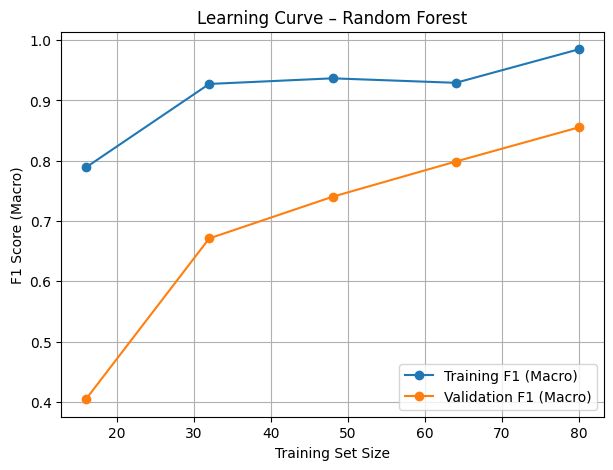

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    final_model, X, y,
    cv=5,
    scoring='f1_macro',
    train_sizes=np.linspace(0.2, 1.0, 5)
)
import matplotlib.pyplot as plt

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, marker='o', label='Training F1 (Macro)')
plt.plot(train_sizes, val_mean, marker='o', label='Validation F1 (Macro)')

plt.xlabel("Training Set Size")
plt.ylabel("F1 Score (Macro)")
plt.title("Learning Curve – Random Forest")
plt.legend()
plt.grid(True)
plt.show()


Observation: The learning curve confirms that the model generalizes well because training and validation scores converge as data increases and validation performance stabilizes at a high level.

In [ ]:
from sklearn.metrics import classification_report

y_test_pred = final_model.predict(X_test)

print(classification_report(
    y_test,
    y_test_pred,
    target_names=animal_class["Class_Type"]
))


              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        15
        Bird       1.00      1.00      1.00         7
     Reptile       1.00      0.50      0.67         2
        Fish       1.00      1.00      1.00         5
   Amphibian       0.50      1.00      0.67         1
         Bug       1.00      0.33      0.50         3
Invertebrate       0.60      1.00      0.75         3

    accuracy                           0.92        36
   macro avg       0.87      0.83      0.80        36
weighted avg       0.95      0.92      0.91        36



The model demonstrates strong overall performance, achieving a weighted F1 score of 0.91, which indicates high accuracy on majority classes.

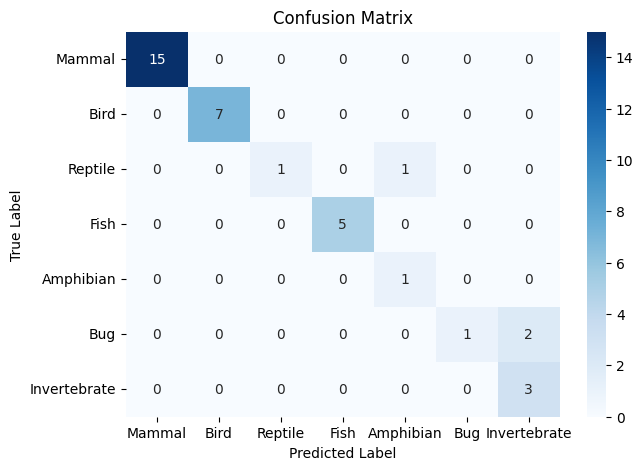

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(7,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=animal_class["Class_Type"],
    yticklabels=animal_class["Class_Type"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The model classifies Mammals, Birds, and Fish perfectly, with all instances correctly predicted and no misclassifications. Minor confusion occurs among Reptile, Amphibian, Bug, and Invertebrate classes, which is expected due to their smaller sample sizes and overlapping feature patterns

# **Validation Using Unseen Data**

In [ ]:
def predict_animal_class(model, input_data, class_df):
    """
    Predict animal class from input features.

    Parameters:
    - model: trained ML model (final_model)
    - input_data: dict of animal features
    - class_df: dataframe containing class mapping (class.csv)

    Returns:
    - predicted class name
    - prediction confidence
    """

    import pandas as pd

    # Convert input dict to DataFrame
    input_df = pd.DataFrame([input_data])

    # Predict class number
    pred_class = model.predict(input_df)[0]

    # Map class number to class name
    class_map = dict(zip(class_df['Class_Number'], class_df['Class_Type']))
    pred_label = class_map[pred_class]

    # Prediction confidence (if supported)
    confidence = None
    if hasattr(model, "predict_proba"):
        confidence = model.predict_proba(input_df).max()

    return pred_label, confidence
new_animal = {
    'hair': 0,
    'feathers': 1,
    'eggs': 1,
    'milk': 0,
    'airborne': 1,
    'aquatic': 0,
    'predator': 0,
    'toothed': 0,
    'backbone': 1,
    'breathes': 1,
    'venomous': 0,
    'fins': 0,
    'legs': 2,
    'tail': 1,
    'domestic': 0,
    'catsize': 0
}

label, confidence = predict_animal_class(final_model, new_animal, animal_class)

print("Predicted Animal Class:", label)
print("Prediction Confidence:", round(confidence, 3))



Predicted Animal Class: Bird
Prediction Confidence: 0.962


In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

import joblib
joblib.dump(final_model, "animal_classifier.pkl")
joblib.dump(animal_class, "class_mapping.pkl")


scikit-learn version: 1.6.1


['class_mapping.pkl']